This file will find the sentiment scores of reivews from the restaurant Popping Yolk Cafe. It will then split the data from before and after Keith Lee posts a review on this restaurant, and creates 2 pie charts (one for before, one for after) to see the ratio of positive (sentiment scores >0) vs. negative reviews (sentiment scores <0).

When running on Colab, make sure the csv files for this restaurant (found in DATA/datasets) are accessible in the contents folder, or change the file path where needed.

Within this code, the script also gave the final dataset (has sentiment scores), which can be seen in DATA/final data analyzed.

In [12]:
# imports
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [13]:
# downloading and preparing sentiment analyzer
nltk.download('vader_lexicon')
sentiment = SentimentIntensityAnalyzer()
# https://medium.com/@rslavanyageetha/vader-a-comprehensive-guide-to-sentiment-analysis-in-python-c4f1868b0d2e

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
# Popping Yolk Cafe: Before
poppingBefore = pd.read_csv('/content/Popping Yolk Cafe Before.csv')
poppingBefore.head(3)

,Date,Review
0,7-Dec-22,Eggs benedict is easily my favorite breakfast ...
1,7-Dec-22,"I've come here before, around opening time and..."
2,7-Dec-22,Items:1. BBQ Pulled Pork Benedict (top) | $17....


In [16]:
#made an empty list, then iterated through the scores and put them into the empty list
#then made a new column 'SentimentScore' in the dataframe
scores = []

for each in poppingBefore['Review']:
  poppingBeforeScores = sentiment.polarity_scores(each)
  #print(poppingBeforeScores['compound'])
  #print(type(poppingBeforeScores['compound']))
  scores.append(poppingBeforeScores['compound'])

#print(scores)

poppingBefore['SentimentScore'] = scores
poppingBefore.head(4)

#https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

#export to csv
poppingBefore.to_csv('poppingBeforeWithScores.csv', index=False)

In [17]:
#cleaning up
#del poppingBefore['Sentiment Score']
#del poppingBefore['Sentiment_Score']
poppingBefore.head(3)

,Date,Review,SentimentScore
0,7-Dec-22,Eggs benedict is easily my favorite breakfast ...,0.8649
1,7-Dec-22,"I've come here before, around opening time and...",-0.4806
2,7-Dec-22,Items:1. BBQ Pulled Pork Benedict (top) | $17....,0.9450


In [18]:
#counting the total number of pos values to compare to overall total number of reviews
#will repeat this process for negative
totalPositiveScoresBefore = (poppingBefore['SentimentScore']>0).sum()
print(totalPositiveScoresBefore)

positiveRatioBefore = (poppingBefore['SentimentScore']>0).mean()
print(positiveRatioBefore)


print(len(poppingBefore))


totalNegativeScoresBefore = (poppingBefore['SentimentScore']<=0).sum()
print(totalNegativeScoresBefore)


negativeRatioBefore = (poppingBefore['SentimentScore']<=0).mean()
print(negativeRatioBefore)

# i love basic addition

615
0.8978102189781022
685
70
0.10218978102189781


In [19]:
#Popping Yolk Cafe: After
poppingAfter = pd.read_csv('/content/Popping Yolk Cafe After.csv')

poppingAfter = poppingAfter.filter(['Date','Review'], axis=1)
#filtering bc this one had a bunch of empty random columns that we didn't need
#https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy
poppingAfter.head(5)
#fixed!

,Date,Review
0,18-Sep-24,Decent amount of people in the morning around ...
1,14-Sep-24,I had a full serving of banana French toast. W...
2,9-Sep-24,Omg this place is so yummy! Love the decor and...
3,7-Sep-24,We ordered two meals and two drinks for about ...
4,5-Sep-24,"Me and my wife were in the area, and decided t..."


In [20]:
scoresAfterPopping = []

scoresAsStrings = poppingAfter['Review'].astype(str)
#scoresAsStrings.head(20)

for each in scoresAsStrings:
  poppingAfterScores = sentiment.polarity_scores(each)
  scoresAfterPopping.append(poppingAfterScores['compound'])


poppingAfter['SentimentScore'] = scoresAfterPopping

poppingAfter=poppingAfter.dropna()
#lots of NaN values at the end- no words for the reviews, just stars
#deleted for our purposes
poppingAfter.head(-5)

#export to csv
poppingAfter.to_csv('poppingAfterWithScores.csv', index=False)

In [21]:
#counting the total number of pos and neg values to compare to overall total number of reviews
totalPositiveScoresAfter = (poppingAfter['SentimentScore']>0).sum()
print(totalPositiveScoresAfter)
#total of 347 positive reviews

positiveRatioAfter = (poppingAfter['SentimentScore']>0).mean()
print(positiveRatioAfter)
# so the positive review proportion here would be 347/361 (0.9612)


print(len(poppingAfter))
#total reviews: 361

totalNegativeScoresAfter = (poppingAfter['SentimentScore']<=0).sum()
print(totalNegativeScoresAfter)
#this is 14


negativeRatioAfter = (poppingAfter['SentimentScore']<=0).mean()
print(negativeRatioAfter)

# proportion is 14/361 (0.03878) for negative reviews

308
0.9166666666666666
336
28
0.08333333333333333


# Chart Analysis

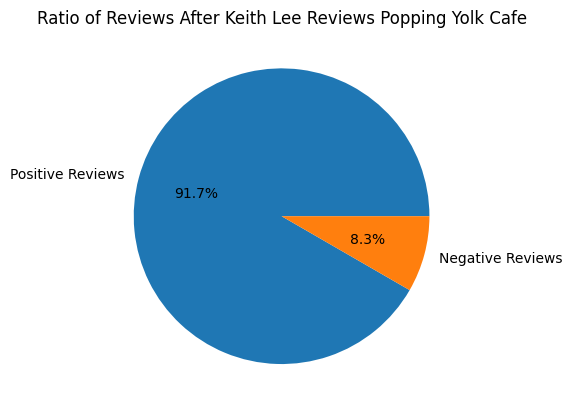

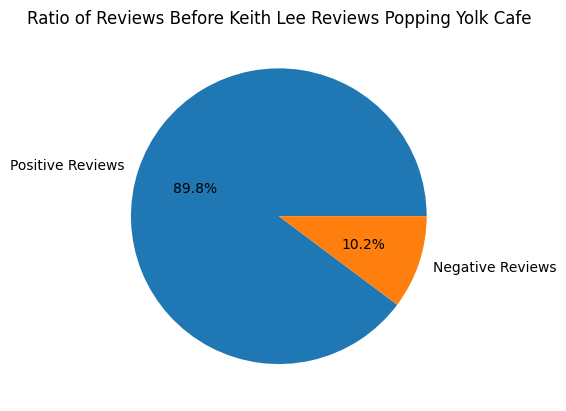

In [22]:
#making a pie chart for before and after
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

import matplotlib.pyplot as plt

#AFTER PIE CHART: POPPING YOLK CAFE
values = [positiveRatioAfter, negativeRatioAfter]

plt.pie(values, labels=('Positive Reviews', 'Negative Reviews'), autopct='%1.1f%%')
plt.title('Ratio of Reviews After Keith Lee Reviews Popping Yolk Cafe')
plt.show()

#BEFORE PIE CHART: POPPING YOLK CAFE
values = [positiveRatioBefore, negativeRatioBefore]

plt.pie(values, labels=('Positive Reviews', 'Negative Reviews'), autopct='%1.1f%%')
plt.title('Ratio of Reviews Before Keith Lee Reviews Popping Yolk Cafe')
plt.show()
